In [60]:
#read the cancer csv file first 
import pandas as pd
import numpy as np
csd = pd.read_csv('C:/Users/Zi Li/Desktop/csd.csv')
csd = pd.DataFrame(data=csd)
csd2=pd.DataFrame(data=csd)
my_cols = set(csd.columns)  # getting all the columns
#removing the undesired column
csd['gender'] = np.where(csd['gender'] == "FEMALE", '1', '0')  #recode the gender variable 
csd2['gender'] = np.where(csd2['gender'] == "FEMALE", '1', '0')

my_cols.remove('feature') #patient ID 
my_cols.remove('grade')   #grade of tumor is close to survival status
my_cols.remove('stage')   #stage of cancer is close to survical status 
my_cols.remove('OS_vital_status')
my_cols = list(my_cols)
x = csd[my_cols]
y = csd2.OS_vital_status

In [61]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)



In [62]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)



In [63]:
# import the metrics class
from sklearn import metrics

cnf_matrix_logistic = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_logistic 

array([[27,  5],
       [14, 15]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

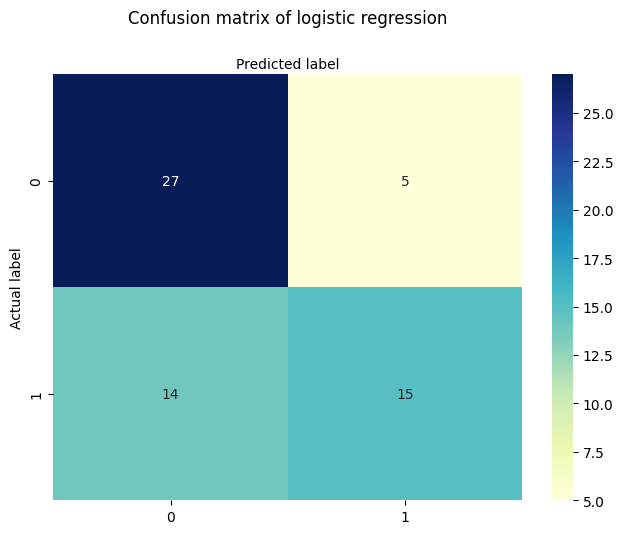

In [64]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [65]:
accuracy_logistic= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic)

Accuracy: 0.6885245901639344


In [66]:
#for random forest 
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [67]:
#train a random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_random_forest= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_random_forest)

Accuracy: 0.6229508196721312


In [68]:
#hyperparater tuning for random forest
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000296D1946C00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000296838F4920>})

In [69]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)



Best hyperparameters: {'max_depth': 15, 'n_estimators': 200}


Text(0.5, 427.9555555555555, 'Predicted label')

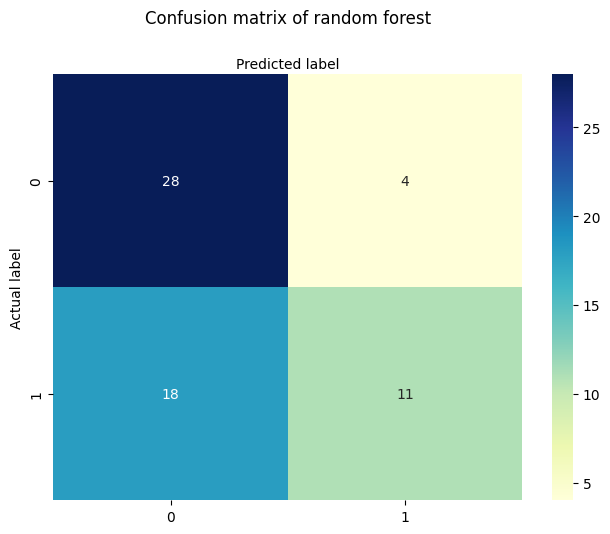

In [70]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm_random_forest = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_random_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of random forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
#it looks like logistic regression and random forest don't predict well enough due to low accuracy, for the dataset
#whose column number is much more than the number of subjects, I will try SVM for high dimentional data
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7540983606557377


Text(0.5, 427.9555555555555, 'Predicted label')

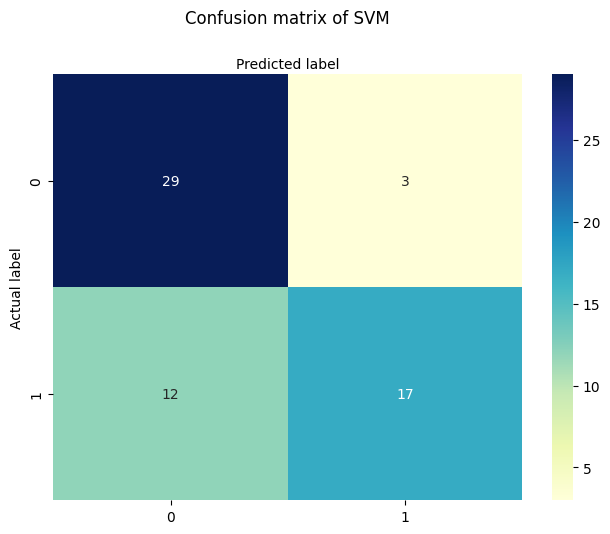

In [72]:
# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')